In [1]:
import seaborn as sns
from alphaanalysis.plot.gam import get_sig_intervals
from matplotlib import pyplot as plt

# Data Base

In [ ]:
%%capture

from djimaging.user.alpha.schemas.alpha_schema import *
from djimaging.user.alpha.utils import database

indicator = 'glutamate'
database.connect_dj(indicator=indicator)

# Data

In [3]:
rf_tab = (database.get_rf_tab(quality_filter=True, roi_kind='roi').proj(rf_size='rf_cdia_um', surround_index='full_surround_index', tri='transience_idx') * 
          FieldPosMetrics.RoiPosMetrics.proj(soma_dist='d_dist_to_soma') * 
          RetinalFieldLocationCat().proj(group="nt_side"))
df = rf_tab.fetch(format='frame').reset_index()
df

,experimenter,date,exp_num,field,stim_name,raw_id,cond1,roi_id,preprocess_id,dnoise_params_id,rf_glm_params_id,split_rf_params_id,rf_contours_params_id,roi_pos_params_hash,table_hash,tri,rf_size,surround_index,soma_dist,group
0,Ran,2020-11-03,1,d1,noise_1500,1,control,1,1,1,10,1,1,f7306d4829c0b702ef3329af09bf53bc,67f28a1bf74f1f3a68beb187e0ca8913,1.455310,85.3178,-0.021812,95.1105,t
1,Ran,2020-11-03,1,d1,noise_1500,1,control,2,1,1,10,1,1,f7306d4829c0b702ef3329af09bf53bc,67f28a1bf74f1f3a68beb187e0ca8913,1.374310,84.0631,-0.021892,98.8116,t
2,Ran,2020-11-03,1,d1,noise_1500,1,control,3,1,1,10,1,1,f7306d4829c0b702ef3329af09bf53bc,67f28a1bf74f1f3a68beb187e0ca8913,1.215410,71.5601,-0.008966,112.2100,t
3,Ran,2020-11-03,1,d1,noise_1500,1,control,4,1,1,10,1,1,f7306d4829c0b702ef3329af09bf53bc,67f28a1bf74f1f3a68beb187e0ca8913,1.382640,82.4659,-0.027127,114.9270,t
4,Ran,2020-11-03,1,d1,noise_1500,1,control,5,1,1,10,1,1,f7306d4829c0b702ef3329af09bf53bc,67f28a1bf74f1f3a68beb187e0ca8913,1.306560,76.6852,-0.036656,132.2170,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,Ran,2020-11-27,2,d5,noise_1500,1,control,10,1,1,10,1,1,f7306d4829c0b702ef3329af09bf53bc,67f28a1bf74f1f3a68beb187e0ca8913,0.227693,74.1925,-0.162183,85.5959,n
493,Ran,2020-11-27,2,d5,noise_1500,1,control,11,1,1,10,1,1,f7306d4829c0b702ef3329af09bf53bc,67f28a1bf74f1f3a68beb187e0ca8913,0.512540,92.3519,0.003427,72.3694,n
494,Ran,2020-11-27,2,d5,noise_1500,1,control,12,1,1,10,1,1,f7306d4829c0b702ef3329af09bf53bc,67f28a1bf74f1f3a68beb187e0ca8913,0.280540,78.5527,-0.032258,65.5098,n
495,Ran,2020-11-27,2,d5,noise_1500,1,control,13,1,1,10,1,1,f7306d4829c0b702ef3329af09bf53bc,67f28a1bf74f1f3a68beb187e0ca8913,0.315275,68.3358,-0.189230,61.4082,n


In [4]:
import utils

df = utils.prep_df(df)
df.head()

,experimenter,date,exp_num,field,cond1,roi_id,tri,rf_size,surround_index,soma_dist,group,cell_id,field_id
0,Ran,2020-11-03,1,d1,control,1,1.45531,85.3178,-0.021812,95.1105,t,2020-11-03_1,2020-11-03_1_d1
1,Ran,2020-11-03,1,d1,control,2,1.37431,84.0631,-0.021892,98.8116,t,2020-11-03_1,2020-11-03_1_d1
2,Ran,2020-11-03,1,d1,control,3,1.21541,71.5601,-0.008966,112.2100,t,2020-11-03_1,2020-11-03_1_d1
3,Ran,2020-11-03,1,d1,control,4,1.38264,82.4659,-0.027127,114.9270,t,2020-11-03_1,2020-11-03_1_d1
4,Ran,2020-11-03,1,d1,control,5,1.30656,76.6852,-0.036656,132.2170,t,2020-11-03_1,2020-11-03_1_d1


# Plot

In [5]:
from alphaanalysis import plot as plota
plota.set_rc_params()

In [6]:
order = plota.get_order(indicator=indicator)
palette = plota.get_palette(indicator=indicator)
colors = [palette[group] for group in order]

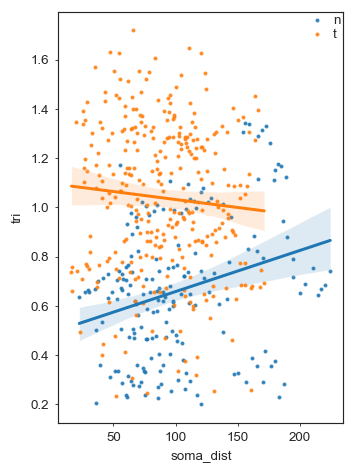

In [7]:
utils.plot_scatter_metrics(df, ['tri'], groupby='group')

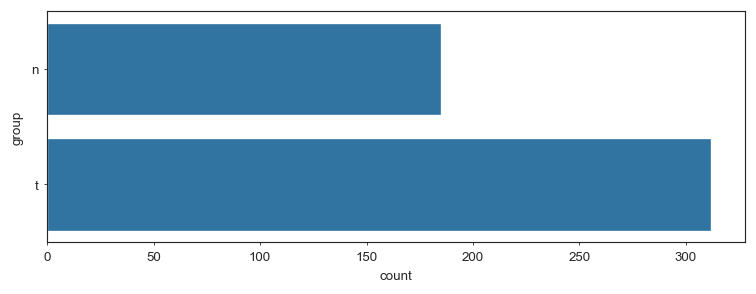

In [8]:
sns.countplot(data=df, y="group");

# Fit GAM

In [9]:
%load_ext rpy2.ipython

In [10]:
%%R
#noqa

rm(list=ls()) 

In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


## R imports

In [11]:
%%R
#noqa

library("IRdisplay")
library("dplyr")
library('parallel')
library('ggplot2')
library("nlme")
library("mgcv")
library("ggthemes")
library("itsadug")
library("png")
library("xtable")
library("tidymv")
library("cowplot")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse

This is mgcv 1.9-0. For overview type 'help("mgcv-package")'.
Loading required package: plotfunctions

Attaching package: ‘plotfunctions’

The following object is masked from ‘package:ggplot2’:

    alpha

Loaded package itsadug 2.4 (see 'help("itsadug")' ).

Attaching package: ‘xtable’

The following object is masked from ‘package:IRdisplay’:

    display

tidymv has been superseded by tidygam. The package tidymv is no longer maintained but will be
    kept on CRAN to ensure reproducibility of older analyses. Users should
    use the replacement package tidygam for new analyses, which is available on
    CRAN and GitHub (https://github.com/stefanocoretta/tidygam).

Attaching package: ‘tidymv’

Th

# Import R df

In [12]:
%%R -i df
#noqa

df$group <- factor(df$group)
df$cell_id <- factor(df$cell_id)
df$field_id <- factor(df$field_id)


df <- df[df$soma_dist <= 200, ]

head(df)

  experimenter   date exp_num field   cond1 roi_id     tri rf_size
0          Ran 737732       1    d1 control      1 1.45531 85.3178
1          Ran 737732       1    d1 control      2 1.37431 84.0631
2          Ran 737732       1    d1 control      3 1.21541 71.5601
3          Ran 737732       1    d1 control      4 1.38264 82.4659
4          Ran 737732       1    d1 control      5 1.30656 76.6852
5          Ran 737732       1    d1 control      6 1.23528 81.9225
  surround_index soma_dist group      cell_id        field_id
0    -0.02181220   95.1105     t 2020-11-03_1 2020-11-03_1_d1
1    -0.02189200   98.8116     t 2020-11-03_1 2020-11-03_1_d1
2    -0.00896591  112.2100     t 2020-11-03_1 2020-11-03_1_d1
3    -0.02712750  114.9270     t 2020-11-03_1 2020-11-03_1_d1
4    -0.03665570  132.2170     t 2020-11-03_1 2020-11-03_1_d1
5    -0.08097780  104.1770     t 2020-11-03_1 2020-11-03_1_d1


## Helper functions

In [13]:
%%R
#noqa

display_model <- function(m){
    print(summary(m));
    tabs <- capture.output(gamtabs(m, type="HTML"));
    display_html(tabs);
}

## Plot raw data

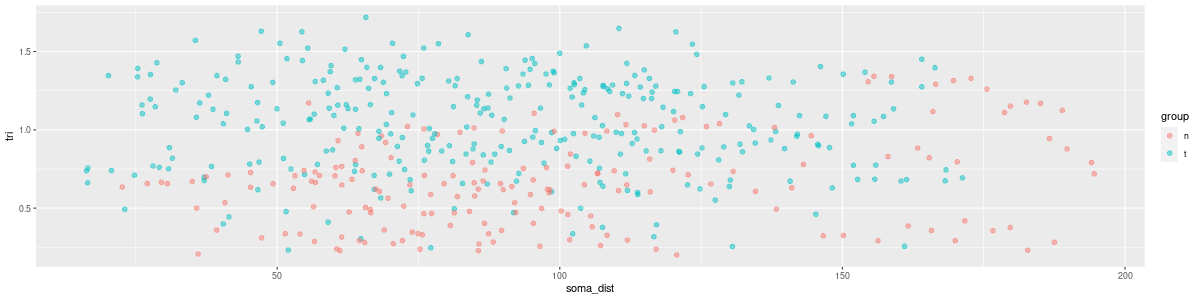

In [14]:
%%R -w 1200 -h 300
#noqa

p1 <- ggplot(aes(x=soma_dist, y=tri, color=group), data=df)  +
    geom_point(alpha=.5, size=2)

p1

# GAMs

## TRi

In [15]:
%%R
#noqa

m1_tri  <- gam(tri ~ group + s(soma_dist, k=8, bs="cr"), data=df)
m2_tri  <- gam(tri ~ group + s(soma_dist, by=group, k=8, bs="cr"), data=df)
m3a_tri <- gam(tri ~ group + s(soma_dist, by=group, k=8, bs="cr") + s(cell_id, bs="re"), data=df)
m3b_tri <- gam(tri ~ group + s(soma_dist, by=group, k=8, bs="cr") + s(cell_id, bs="re"), data=df, family='scat')
m4a_tri <- gam(tri ~ group + s(soma_dist, by=group, k=12, bs="cr") + s(cell_id, bs="re"), data=df)
m4b_tri <- gam(tri ~ group + s(soma_dist, by=group, k=12, bs="cr") + s(cell_id, bs="re"), data=df, family='scat')
m5a_tri <- gam(tri ~ group + s(soma_dist, by=group, k=16, bs="cr") + s(cell_id, bs="re"), data=df)
m5b_tri <- gam(tri ~ group + s(soma_dist, by=group, k=16, bs="cr") + s(cell_id, bs="re"), data=df, family='scat')

In [16]:
%%R
#noqa

BIC(m1_tri, m2_tri, m3a_tri, m3b_tri, m4a_tri, m4b_tri, m5a_tri, m5b_tri)

               df       BIC
m1_tri   4.000000 233.28433
m2_tri   5.801721 226.22388
m3a_tri 14.642744  25.10927
m3b_tri 15.992464  12.48029
m4a_tri 14.642744  25.10927
m4b_tri 15.992459  12.48025
m5a_tri 14.642744  25.10927
m5b_tri 15.992461  12.48027


In [17]:
%%R
#noqa

anova(m1_tri, m2_tri, m3a_tri, m4a_tri, m5a_tri, test="F")

Analysis of Deviance Table

Model 1: tri ~ group + s(soma_dist, k = 8, bs = "cr")
Model 2: tri ~ group + s(soma_dist, by = group, k = 8, bs = "cr")
Model 3: tri ~ group + s(soma_dist, by = group, k = 8, bs = "cr") + s(cell_id, 
    bs = "re")
Model 4: tri ~ group + s(soma_dist, by = group, k = 12, bs = "cr") + s(cell_id, 
    bs = "re")
Model 5: tri ~ group + s(soma_dist, by = group, k = 16, bs = "cr") + s(cell_id, 
    bs = "re")
  Resid. Df Resid. Dev          Df Deviance       F    Pr(>F)    
1    487.00     43.906                                           
2    484.75     42.303  2.2548e+00   1.6027 13.4925 5.936e-07 ***
3    476.01     25.095  8.7305e+00  17.2085 37.4155 < 2.2e-16 ***
4    476.01     25.095  7.7167e-09   0.0000  5.6182 6.587e-08 ***
5    476.01     25.095 -9.5420e-09   0.0000  5.1224 8.088e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [18]:
%%R
#noqa

anova(m3b_tri, m4b_tri, m5b_tri, test="F")

Analysis of Deviance Table

Model 1: tri ~ group + s(soma_dist, by = group, k = 8, bs = "cr") + s(cell_id, 
    bs = "re")
Model 2: tri ~ group + s(soma_dist, by = group, k = 12, bs = "cr") + s(cell_id, 
    bs = "re")
Model 3: tri ~ group + s(soma_dist, by = group, k = 16, bs = "cr") + s(cell_id, 
    bs = "re")
  Resid. Df Resid. Dev          Df    Deviance  Pr(>Chi)    
1    475.76    -86.584                                      
2    475.76    -86.584 -8.4664e-06 -5.5713e-07 6.145e-05 ***
3    475.76    -86.584  3.5898e-06  2.3451e-07 2.761e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



Family: Scaled t(5.015,0.182) 
Link function: identity 

Formula:
tri ~ group + s(soma_dist, by = group, k = 8, bs = "cr") + s(cell_id, 
    bs = "re")

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.6627     0.1010   6.564 5.24e-11 ***
groupt        0.3840     0.1320   2.909  0.00362 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
                      edf Ref.df  Chi.sq p-value    
s(soma_dist):groupn 1.000      1  59.498  <2e-16 ***
s(soma_dist):groupt 1.000      1   0.289   0.591    
s(cell_id)          9.744     10 441.694  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =   0.56   Deviance explained = 53.9%
-REML = -9.2359  Scale est. = 1         n = 490

Method: REML   Optimizer: outer newton
full convergence after 15 iterations.
Gradient range [-6.819629e-06,-5.838792e-09]
(score -9.235922 & scale 1).
Hessian positive defini

In addition: Warning message:
In getOption("jupyter.base_display_func")(data, metadata) :
  IRdisplay can only be used from the IPython R kernel and R magic.


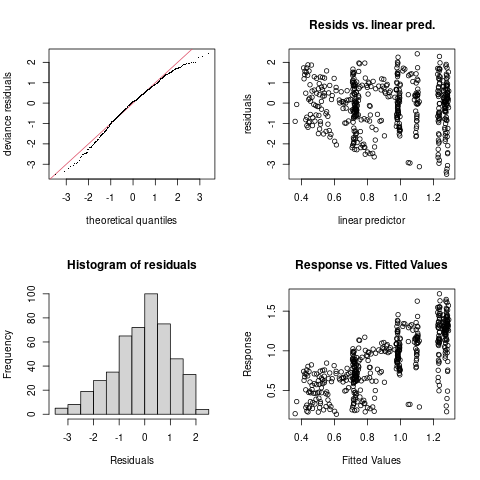

In [19]:
%%R
#noqa

m_rf_tri <- m3b_tri
display_model(m_rf_tri)
gam.check(m_rf_tri)

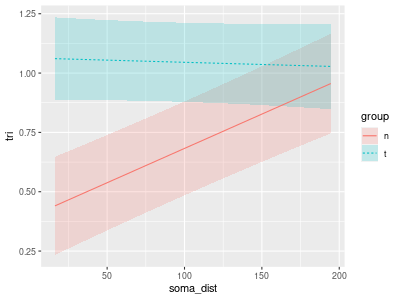

In [20]:
%%R -w 400 -h 300
#noqa

p1 <- plot_smooths(model=m_rf_tri, series=soma_dist, comparison=group)
plot(p1, ylim=c(0, 60))

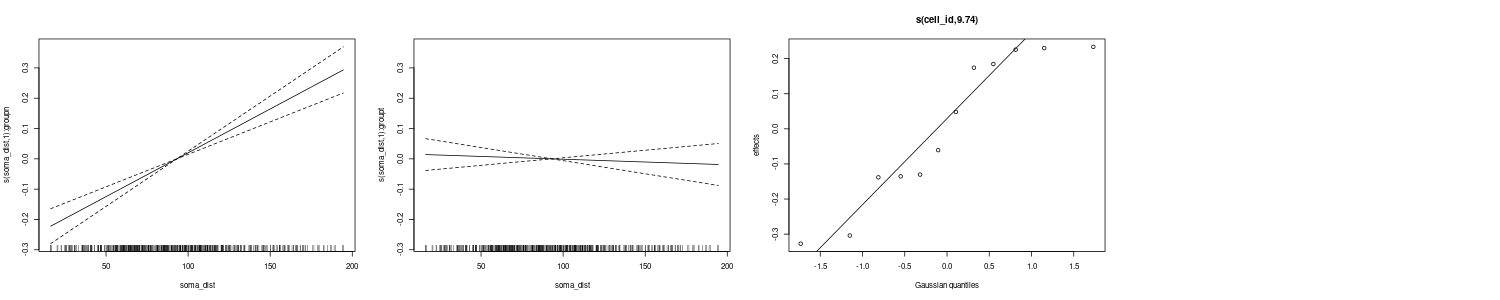

In [21]:
%%R -w 1500 -h 300
#noqa

par(mfrow = c(1,4))
plot(m_rf_tri)

### Plot fits

In [22]:
%%R
#noqa

r_df_pred_tri = predict_gam(m_rf_tri, exclude_terms=s(cell_id, bs="re"))
head(r_df_pred_tri)

# A tibble: 6 × 5
  group soma_dist cell_id        fit se.fit
  <fct>     <dbl> <fct>        <dbl>  <dbl>
1 n          16.3 2020-11-03_1 0.440 0.106 
2 t          16.3 2020-11-03_1 1.06  0.0888
3 n          19.9 2020-11-03_1 0.451 0.105 
4 t          19.9 2020-11-03_1 1.06  0.0884
5 n          23.5 2020-11-03_1 0.462 0.105 
6 t          23.5 2020-11-03_1 1.06  0.0881


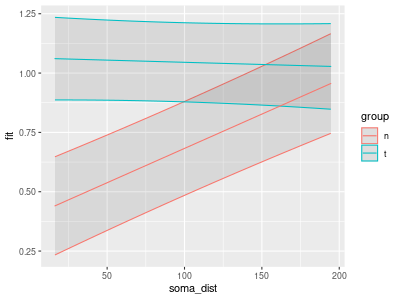

In [23]:
%%R -w 400 -h 300
#noqa

predict_gam(m_rf_tri, exclude_terms=s(cell_id, bs="re")) %>%
    ggplot(aes(soma_dist, fit, col=group)) +
    geom_smooth_ci()

### Plot differences 

[1] 1.959964
Summary:
	* soma_dist : numeric predictor; with 100 values ranging from 16.268800 to 194.552000. 
	* cell_id : factor; set to the value(s): 2020-11-03_1. (Might be canceled as random effect, check below.) 
	* NOTE : The following random effects columns are canceled: s(cell_id)
 

soma_dist window(s) of significant difference(s):
	16.268800 - 131.522586


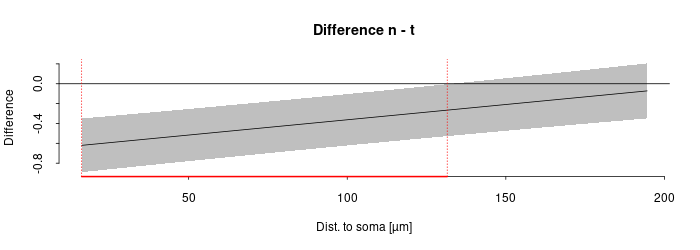

In [24]:
%%R -w 700 -h 250 -o nt_diff_tri
#noqa

n_diffs <- 1
par(mfrow=c(1, n_diffs), cex=1.0, tcl=-0.2)

se <- qnorm((100 - (2.5/n_diffs))/100)
print(se)
ylim <- NULL#c(-150, 150)
ylab <- 'Difference'
xlab <- 'Dist. to soma [µm]'

nt_diff_tri <- plot_diff(m_rf_tri, view="soma_dist", comp=list(group=c("n", "t")), se=se, ylab=ylab, xlab=xlab, ylim=ylim, hide.label=TRUE)

In [25]:
pairs_sig_regions_tri = [
    ("n vs. t", get_sig_intervals(nt_diff_tri)),
]
pairs_sig_regions_tri

[]
[ 0 64]


[('n vs. t', [(16.2688, 131.52258585858584)])]

# Go back to python for easy plotting

In [26]:
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri

from rpy2.robjects.conversion import localconverter

with localconverter(ro.default_converter + pandas2ri.converter):
    df_pred_tri = ro.conversion.rpy2py(ro.globalenv['r_df_pred_tri'])

In [27]:
df_pred_tri.head()

,group,soma_dist,cell_id,fit,se.fit
1,n,16.268800,2020-11-03_1,0.440497,0.105564
2,t,16.268800,2020-11-03_1,1.060820,0.088787
3,n,19.907233,2020-11-03_1,0.451019,0.105173
4,t,19.907233,2020-11-03_1,1.060153,0.088438
5,n,23.545665,2020-11-03_1,0.461542,0.104798


(2.5, 2)


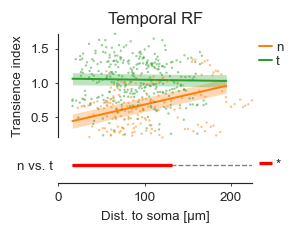

In [28]:
fig, axs = utils.plot_fits(
    df=df,
    df_preds=[df_pred_tri],
    pairs_sig_regions_list=[pairs_sig_regions_tri],
    titles=[None],
    ys=['tri'],
    ylabels=['Transience index'],
    x='soma_dist',
    xlabel='Dist. to soma [µm]',
    order=order, colors=colors,
    figsize=(2.5, 2), ms=2, ma=0.5
)
axs[0].set_title("Temporal RF")
plt.tight_layout()
plt.savefig(f'figures/{indicator}_soma_dist_rf_tri.pdf')
plt.show()